In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pycaret-exo-data/train_data_temp.csv


In [2]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.4/256.4 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / - done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 

In [3]:
from pycaret.regression import *
import pandas as pd

In [4]:
myDataSet = pd.read_csv("/kaggle/input/pycaret-exo-data/train_data_temp.csv")

In [5]:
s = setup(data = myDataSet, target='temp', session_id = 123)

,Description,Value
0,Session id,123
1,Target,temp
2,Target type,Regression
3,Original data shape,"(79999, 14)"
4,Transformed data shape,"(79999, 14)"
5,Transformed train set shape,"(55999, 14)"
6,Transformed test set shape,"(24000, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [6]:
compare_tree_models = compare_models(include = ['dt', 'knn', 'gbr', 'xgboost', 'lightgbm', 'catboost'],fold=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,243.8690,126700.9758,355.9333,0.7363,0.2529,0.1821,7.9633
lightgbm,Light Gradient Boosting Machine,259.9373,133850.1087,365.8367,0.7214,0.2599,0.1938,1.3267
xgboost,Extreme Gradient Boosting,253.0123,134989.1198,367.4008,0.7191,0.2619,0.1887,6.0600
knn,K Neighbors Regressor,240.3703,137478.6198,370.7595,0.7139,0.2641,0.1790,1.3000
gbr,Gradient Boosting Regressor,306.1587,164588.8626,405.6681,0.6574,0.2867,0.2267,9.1667
dt,Decision Tree Regressor,327.8201,256209.6907,506.1292,0.4668,0.3514,0.2425,1.7233


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

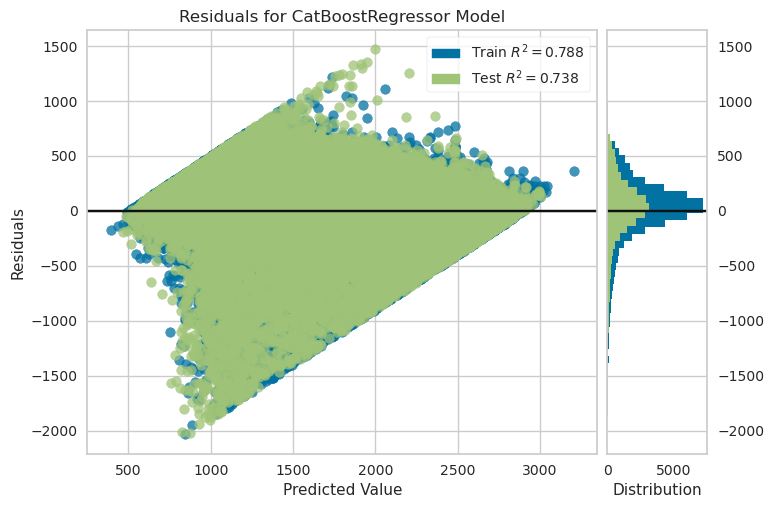

In [7]:
plot_model(compare_tree_models, plot = 'residuals')

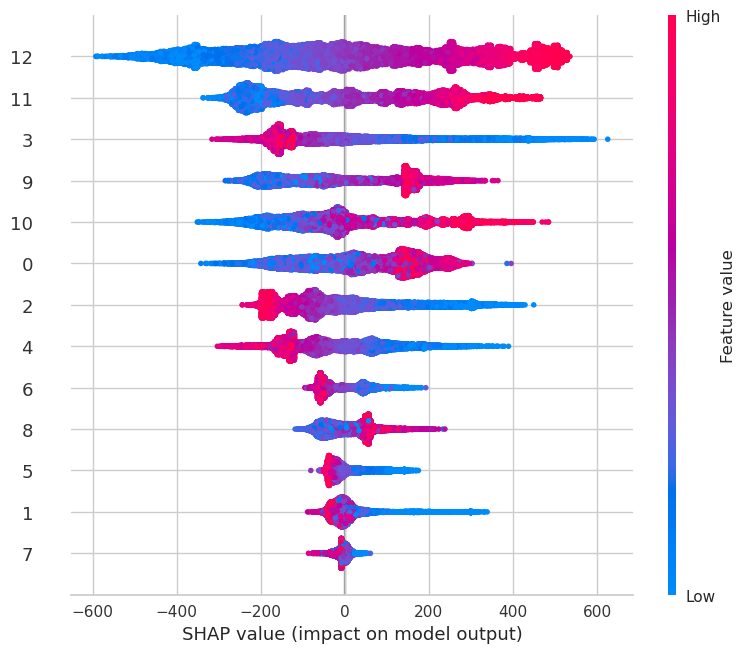

In [8]:
interpret_model(compare_tree_models, plot = 'summary')

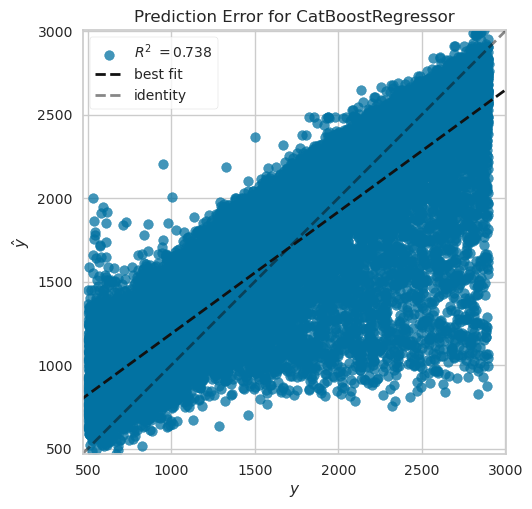

In [9]:
plot_model(compare_tree_models, plot = 'error')

In [10]:
xgboost = create_model('xgboost', fold=2)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,258.0244,140604.2500,374.9723,0.7088,0.2668,0.1917
1,253.1252,133125.7812,364.8640,0.7216,0.2613,0.1898
Mean,255.5748,136865.0156,369.9182,0.7152,0.2640,0.1907
Std,2.4496,3739.2344,5.0541,0.0064,0.0027,0.0009


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

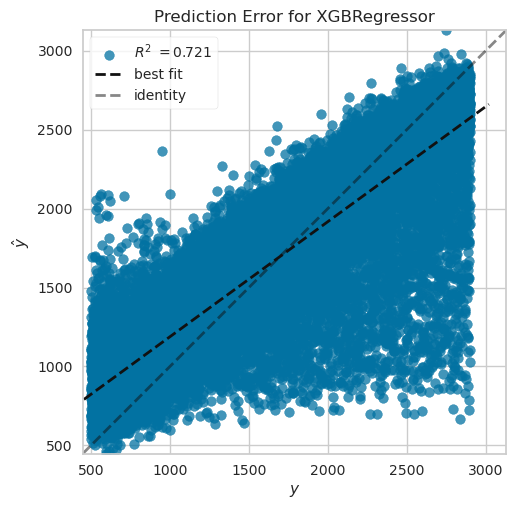

In [11]:
plot_model(xgboost , plot = 'error')

In [12]:
lr = create_model('lr', fold=2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,400.3929,252182.4375,502.1777,0.4777,0.3558,0.3050
1,395.7228,247163.2188,497.1551,0.4831,0.3522,0.3012
Mean,398.0578,249672.8281,499.6664,0.4804,0.3540,0.3031
Std,2.3351,2509.6094,2.5113,0.0027,0.0018,0.0019


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

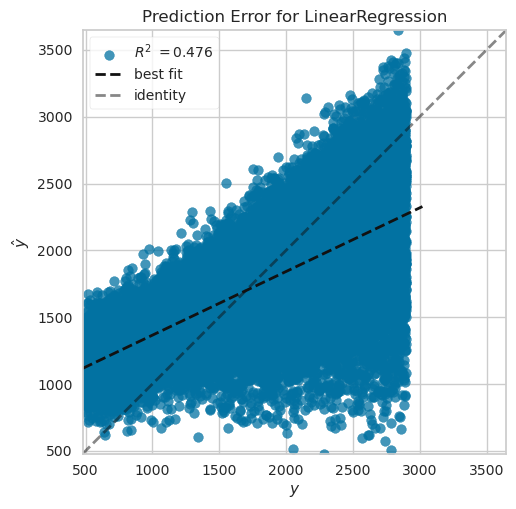

In [13]:
plot_model(lr , plot = 'error')

In [14]:
lightgbm = create_model('lightgbm', fold=2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,263.7893,138203.4998,371.7573,0.7138,0.2634,0.1960
1,258.0682,130662.6085,361.4728,0.7267,0.2575,0.1927
Mean,260.9287,134433.0541,366.6151,0.7202,0.2605,0.1944
Std,2.8606,3770.4456,5.1422,0.0065,0.0030,0.0016


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

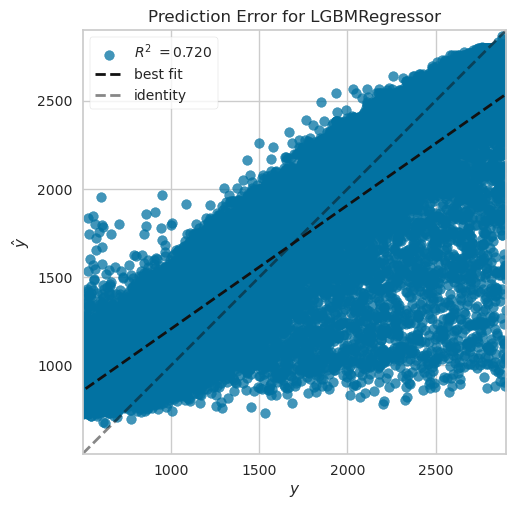

In [15]:
plot_model(lightgbm , plot = 'error')

In [16]:
knn = create_model('knn', fold=2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,243.9347,142430.7031,377.3999,0.7050,0.2682,0.1805
1,240.4996,135455.4688,368.0428,0.7167,0.2628,0.1792
Mean,242.2172,138943.0859,372.7213,0.7109,0.2655,0.1798
Std,1.7175,3487.6172,4.6786,0.0058,0.0027,0.0007


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

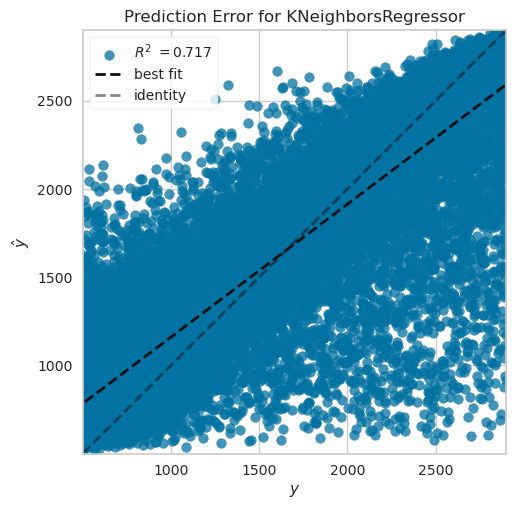

In [17]:
plot_model(knn , plot = 'error')

In [18]:
rf = create_model('rf', fold=2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,242.8821,130379.8499,361.0815,0.7300,0.2582,0.1839
1,238.6024,123748.9816,351.7797,0.7412,0.2531,0.1818
Mean,240.7423,127064.4158,356.4306,0.7356,0.2557,0.1828
Std,2.1399,3315.4342,4.6509,0.0056,0.0025,0.0010


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

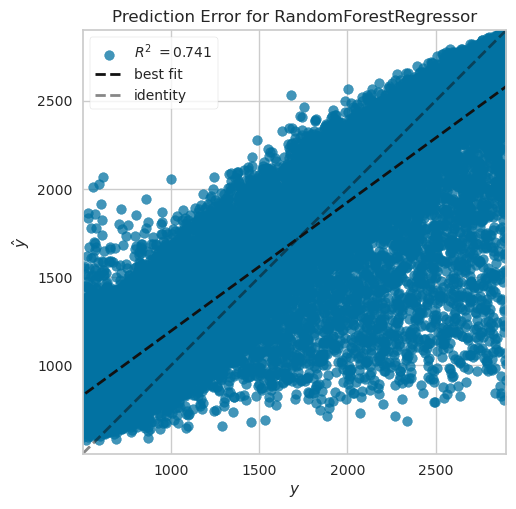

In [19]:
plot_model(rf , plot = 'error')

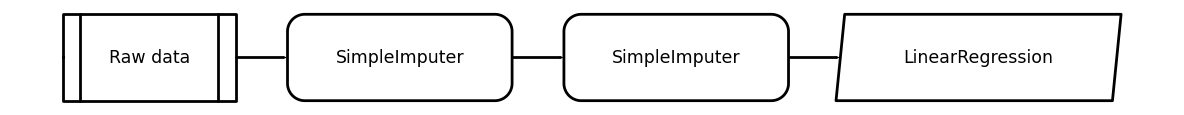

In [20]:
plot_model(lr , plot = 'pipeline')

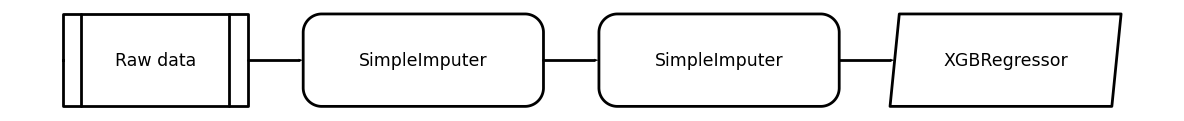

In [21]:
plot_model(xgboost , plot = 'pipeline')

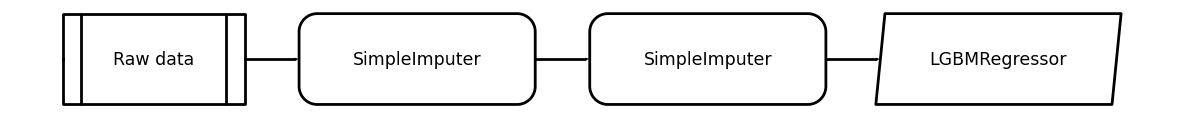

In [22]:
plot_model(lightgbm , plot = 'pipeline')

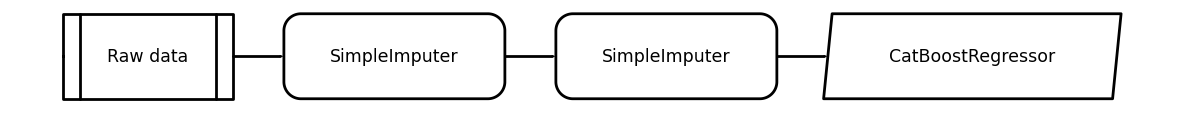

In [23]:
plot_model(compare_tree_models , plot = 'pipeline')

In [24]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,232.8229,121457.5777,348.4508,0.7472,0.2509,0.1784,21.3490
rf,Random Forest Regressor,235.9086,123975.0355,352.0447,0.7420,0.2525,0.1792,80.3860
catboost,CatBoost Regressor,241.5447,124845.1562,353.2666,0.7402,0.2510,0.1805,8.3750
xgboost,Extreme Gradient Boosting,249.9142,131863.5070,363.0679,0.7256,0.2588,0.1866,15.3710
lightgbm,Light Gradient Boosting Machine,258.6884,132708.5693,364.2217,0.7238,0.2590,0.1930,0.9150
knn,K Neighbors Regressor,238.2482,136413.3633,369.2564,0.7161,0.2630,0.1773,0.8570
gbr,Gradient Boosting Regressor,305.5742,164039.3838,404.9517,0.6586,0.2861,0.2262,27.2120
ada,AdaBoost Regressor,409.3566,243308.5687,493.2169,0.4936,0.3686,0.3410,4.0920
lr,Linear Regression,398.0101,249630.0109,499.5999,0.4804,0.3540,0.3031,0.1410
br,Bayesian Ridge,398.0255,249629.9787,499.5998,0.4804,0.3540,0.3031,0.2400


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

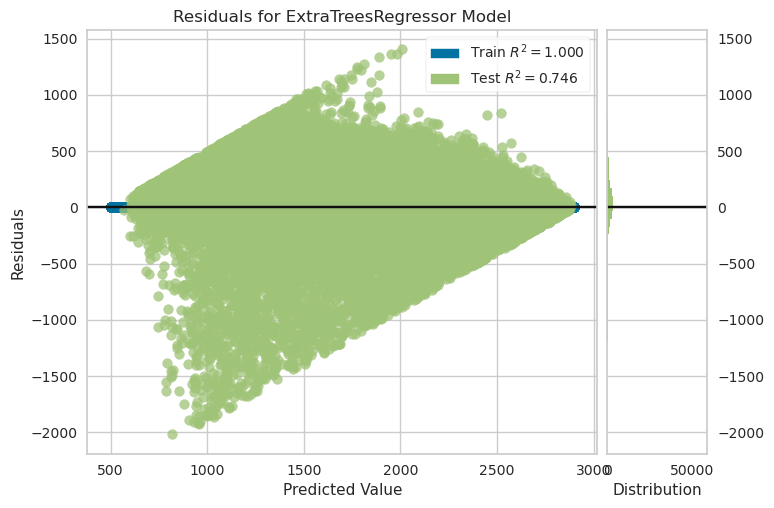

In [25]:
# plot residuals
plot_model(best, plot = 'residuals')

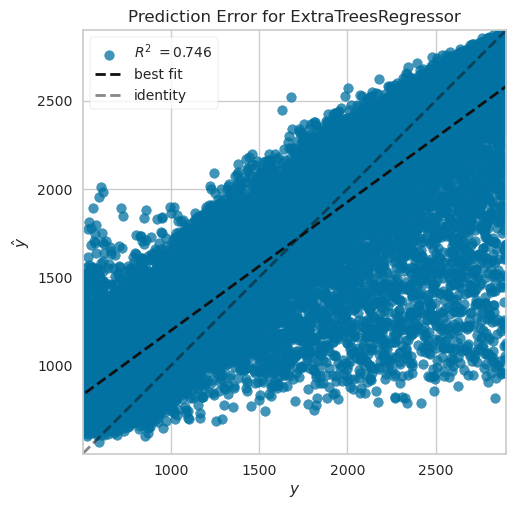

In [26]:
# plot error
plot_model(best, plot = 'error')

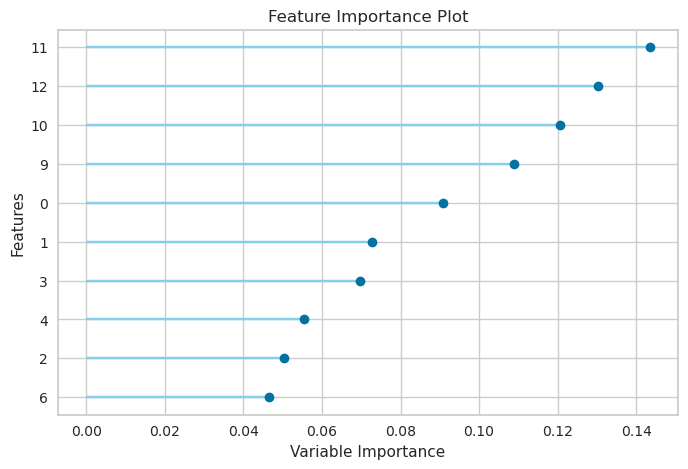

In [27]:
# plot feature importance
plot_model(best, plot = 'feature')

In [28]:
# train rf model
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,239.1832,129726.6553,360.1759,0.7332,0.2582,0.1826
1,243.9775,132488.8480,363.9902,0.7280,0.2643,0.1888
2,235.3395,124633.8752,353.0352,0.7361,0.2519,0.1772
3,235.8222,122871.2445,350.5299,0.7457,0.2524,0.1800
4,236.0156,124930.1474,353.4546,0.7424,0.2506,0.1762
5,234.9142,121447.9480,348.4938,0.7438,0.2484,0.1774
6,232.0681,120380.7297,346.9593,0.7453,0.2505,0.1777
7,236.0120,122314.4910,349.7349,0.7465,0.2509,0.1798
8,228.8540,115881.8885,340.4143,0.7585,0.2458,0.1740


Processing:   0%|          | 0/4 [00:00<?, ?it/s]